In [1]:
import pandas as pd
import numpy as np
#from joblib import Parallel, delayed
from pydicom import dcmread
import os

In [2]:
df = pd.read_excel(
    "Advanced-MRI-Breast-Lesions-DA-Clinical-Sep2024.xlsx",
    header = 1,
    index_col = 0
    )
df.drop(["Unnamed: 2", "Unnamed: 18", "Unnamed: 31", "Unnamed: 44"], axis=1,inplace=True) # dropping empty columns

In [3]:
df

,age at MRI,reason for referral ID#,additional reason for referral ID#,breast implants,BIRADS,tumor/benign1,pos1,pathology1,GRADE1,ER [SII] 1,...,KI67[%] 3,tumor/benign4,pos4,pathology4,tumor/benign5,pos5,pathology5,tumor/benign6,pos6,pathology6
Patient ID,,,,,,,,,,,,,,,,,,,,,
AMBL-001,47.4,2,5,0,4,1.0,L-60.85,9.0,-1,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBL-002,41.3,3,NaN,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBL-003,53.3,6,NaN,0,6,1.0,R-2.76,1.0,3,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBL-004,51.3,3,NaN,1,2,0.0,L-51.98,11.0,-1,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBL-005,75.3,3,5,0,4,1.0,R-28.46,3.0,2,2.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMBL-628,64.0,1,NaN,0,6,1.0,L12.81,3.0,1,strong,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBL-629,32.4,2,NaN,0,2,0.0,L39.93,17.0,-1,-1,...,-1,0.0,R1.93,17.0,0.0,R-48.07,17.0,0.0,R-32.07,17.0
AMBL-630,55.5,3,NaN,0,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Printing the general info about the date. However the non null count may be tricky, because in the dataset the value -1 is used as null value (missing or not applicable), while the meaning of an empty cell has not explained

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, AMBL-001 to AMBL-632
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age at MRI                          200 non-null    float64
 1   reason for referral ID#             200 non-null    int64  
 2   additional reason for referral ID#  44 non-null     object 
 3   breast implants                     200 non-null    int64  
 4   BIRADS                              200 non-null    object 
 5   tumor/benign1                       162 non-null    float64
 6   pos1                                162 non-null    object 
 7   pathology1                          162 non-null    float64
 8   GRADE1                              159 non-null    object 
 9   ER [SII] 1                          160 non-null    object 
 10  PR [SII] 1                          160 non-null    object 
 11  HER2 [SII] 1                        16

# Age at MRI

<Axes: >

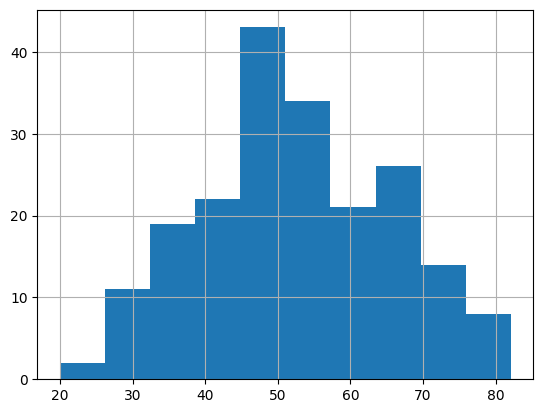

In [ ]:
df["age at MRI"].hist()

In [ ]:
df["age at MRI"].describe()

,age at MRI
count,200.000000
mean,52.807000
std,13.193662
min,20.000000
25%,44.575000
50%,51.950000
75%,63.125000
max,82.100000


# Reason for referral ID

Reason for referral to MRI
1. assessment of extent of disease
2. high risk follow up - family history
3. high risk follow up - previous breast cancer
4. high risk follow up - BRCA
5. investigation of lesion previously seen in mammography / US / self-exam
6. post treatment - response to therapy assessment (NAT)

In [ ]:
df["reason for referral ID#"].value_counts()

,count
reason for referral ID#,
1,80
3,44
5,26
6,23
2,19
4,7
-1,1


# breast implants

In [ ]:
df["breast implants"].value_counts()

,count
breast implants,
0,187
1,13


# BIRADS

Just one missing value, some ambiguity on one lesion which has been detected as both 3 and 4A

In [ ]:
df["BIRADS"].value_counts()

,count
BIRADS,
6,101
2,57
4,22
3,13
0,2
-1,1
4A,1
"3, 4A",1
5,1


# tumor/benign[x]

For each patient up to 6 lesions are detected. Each lesion presents the following fields:
- benign or tumor
- position
- pathology (pathologic diagnosis)
- grade (verosimilmente grado istologico)
- ER ([Estrogen Receptor Status](https://www.breastcancer.org/pathology-report/hormone-receptor-status)) SII (Staining intensity index): A value in the range 0-3, where <0.5 means positive and >0.5 means negative. In some cases, instead of numbers, positive cases are classified into weak/moderate/strong
- PR (Progesterone Receptor Status) SII (Staining intensity index)
- [HER2](https://www.breastcancer.org/pathology-report/her2-status) Receptor status
- [isTN](https://www.breastcancer.org/types/triple-negative) (Tiple Negative): Triple negative breast cancer is an invasive breast cancer.
- ER [%]: percentage of the cells that were colored for estrogen receptors
- PR [%]: percentage of the cells that were colored for progestorone receptors
- HER2[%]
- KI67[%]: percentage of the cells that were colored for KI67 (proliferation rate) for the pathology. The proliferation rate might be low (<15%), intermediate (16-30%) or high (>30%).

In [ ]:
data = []

for idx in range(1,7):
  label = f"tumor/benign{idx}"
  counts = df[label].value_counts(dropna=False)
  data.append([
      counts[0] if 0 in counts else 0,
      counts[1] if 1 in counts else 0,
      counts[np.nan] if np.nan in counts else 0
  ]
  )

In [ ]:
lesions_df = pd.DataFrame(
    data,
    index = [ f"tumor/benign{idx}" for idx in range(1,7)],
    columns = ["0 (Benign)", "1 (Tumor)", "NaN"]
)
lesions_df

,0 (Benign),1 (Tumor),NaN
tumor/benign1,51,111,38
tumor/benign2,55,30,115
tumor/benign3,26,4,170
tumor/benign4,9,0,191
tumor/benign5,3,0,197
tumor/benign6,1,0,199


In [ ]:
lesions_df.sum()

,0
0 (Benign),145
1 (Tumor),145
NaN,910


In [ ]:
total_lesions = 0
lesions_with_position = 0

for idx in range(1,7):
  for lesion, pos in zip(df[f"tumor/benign{idx}"], df[f"pos{idx}"]):
    if not np.isnan(lesion):
      total_lesions += 1
      if not pd.isnull(pos) and pos != -1:
        lesions_with_position += 1

print(f"Among {total_lesions} total lesions, {lesions_with_position} ({lesions_with_position/total_lesions}%) are annotated with the position")

Among 290 total lesions, 281 (0.9689655172413794.2%) are annotated with the position


# Dataset Reorganization

In [4]:
df

,age at MRI,reason for referral ID#,additional reason for referral ID#,breast implants,BIRADS,tumor/benign1,pos1,pathology1,GRADE1,ER [SII] 1,...,KI67[%] 3,tumor/benign4,pos4,pathology4,tumor/benign5,pos5,pathology5,tumor/benign6,pos6,pathology6
Patient ID,,,,,,,,,,,,,,,,,,,,,
AMBL-001,47.4,2,5,0,4,1.0,L-60.85,9.0,-1,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBL-002,41.3,3,NaN,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBL-003,53.3,6,NaN,0,6,1.0,R-2.76,1.0,3,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBL-004,51.3,3,NaN,1,2,0.0,L-51.98,11.0,-1,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBL-005,75.3,3,5,0,4,1.0,R-28.46,3.0,2,2.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMBL-628,64.0,1,NaN,0,6,1.0,L12.81,3.0,1,strong,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBL-629,32.4,2,NaN,0,2,0.0,L39.93,17.0,-1,-1,...,-1,0.0,R1.93,17.0,0.0,R-48.07,17.0,0.0,R-32.07,17.0
AMBL-630,55.5,3,NaN,0,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
patient_df = df[["age at MRI", "reason for referral ID#", "breast implants", "BIRADS"]]

l = [
    [
        [
            index,
            1,
            row["tumor/benign1"],
            row["pos1"],
            row["pathology1"],
            row["GRADE1"],
            row["ER [SII] 1"],
            row["PR [SII] 1"],
            row["HER2 [SII] 1"],
            row["isTN1"],
            row["ER [%] 1"],
            row["PR [%] 1"],
            row["HER2 [%] 1"],
            row["KI67[%] 1"]
        ],
        [
            index,
            2,
            row["tumor/benign2"],
            row["pos2"],
            row["pathology2"],
            row["GRADE2"],
            row["ER [SII] 2"],
            row["PR [SII] 2"],
            row["HER2 [SII] 2"],
            row["isTN2"],
            row["ER [%] 2"],
            row["PR  [%] 2"],
            row["HER  [%] 2"],
            row["KI67[%] 2"]
        ],
        [
            index,
            3,
            row["tumor/benign3"],
            row["pos3"],
            row["pathology3"],
            row["GRADE3"],
            row["ER [SII] 3"],
            row["PR [SII] 3"],
            row["HER [SII] 3"],
            row["isTN3"],
            row["ER [%] 3"],
            row["PR  [%] 3"],
            row["HER  [%] 3"],
            row["KI67[%] 3"]
        ],
        [
            index,
            4,
            row["tumor/benign4"],
            row["pos4"],
            row["pathology4"],
        ],
        [
            index,
            5,
            row["tumor/benign5"],
            row["pos5"],
            row["pathology5"],
        ],
        [
            index,
            6,
            row["tumor/benign6"],
            row["pos6"],
            row["pathology6"],
        ]
    ]
    for index, row in df.iterrows()
]

l = [ e2 for e1 in l[:] for e2 in e1 ]

lesions_df = pd.DataFrame(
    l,
    columns = ["Patient ID", "lesion idx", "tumor/benign", "pos", "pathology", "GRADE", "ER [SII]", "PR [SII]", "HER [SII]", "isTN", "ER [%]", "PR [%]", "HER [%]", "KI67 [%]"]
)
lesions_df.set_index("Patient ID", inplace=True)
lesions_df.dropna(subset="tumor/benign", inplace=True)

In [6]:
lesions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, AMBL-001 to AMBL-632
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion idx    290 non-null    int64  
 1   tumor/benign  290 non-null    float64
 2   pos           288 non-null    object 
 3   pathology     289 non-null    float64
 4   GRADE         273 non-null    object 
 5   ER [SII]      274 non-null    object 
 6   PR [SII]      274 non-null    object 
 7   HER [SII]     274 non-null    object 
 8   isTN          14 non-null     float64
 9   ER [%]        274 non-null    object 
 10  PR [%]        274 non-null    object 
 11  HER [%]       274 non-null    float64
 12  KI67 [%]      274 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 31.7+ KB


In [7]:
lesions_df

,lesion idx,tumor/benign,pos,pathology,GRADE,ER [SII],PR [SII],HER [SII],isTN,ER [%],PR [%],HER [%],KI67 [%]
Patient ID,,,,,,,,,,,,,
AMBL-001,1,1.0,L-60.85,9.0,-1,-1,-1,-1,NaN,-1,-1,-1.0,-1
AMBL-001,2,1.0,R-56.85,8.0,-1,-1,-1,-1,NaN,-1.0,-1.0,-1.0,-1
AMBL-003,1,1.0,R-2.76,1.0,3,-1,-1,-1,NaN,-1,-1,-1.0,-1
AMBL-004,1,0.0,L-51.98,11.0,-1,-1,-1,-1,NaN,-1,-1,-1.0,-1
AMBL-005,1,1.0,R-28.46,3.0,2,2.9,1.4,0,NaN,100,70,20.0,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMBL-629,5,0.0,R-48.07,17.0,None,None,None,None,NaN,None,None,NaN,None
AMBL-629,6,0.0,R-32.07,17.0,None,None,None,None,NaN,None,None,NaN,None
AMBL-631,1,1.0,L33.93,1.0,1 to 2,strong,neg,neg,NaN,-1,0,0.0,5


# Data Analysis

## ER [SII], PR [SII], HER [SII], isTN, ER [%], PR [%], HER [%], KI67 [%]

In [8]:
lesions_df[lesions_df["HER [SII]"]!=-1].dropna()[["ER [SII]", "PR [SII]", "HER [SII]", "isTN", "ER [%]", "PR [%]", "HER [%]", "KI67 [%]"]]

,ER [SII],PR [SII],HER [SII],isTN,ER [%],PR [%],HER [%],KI67 [%]
Patient ID,,,,,,,,
AMBL-011,0,0,0,1.0,0,0,0.0,high
AMBL-028,0,0,0,1.0,0,0,0.0,30
AMBL-089,0.1,0,neg,1.0,10,0,0.0,high
AMBL-089,0.1,0,neg,1.0,10.0,0.0,0.0,high
AMBL-356,0,0,0,1.0,0,0,0.0,70
AMBL-439,0,0,0,1.0,0,0,0.0,70
AMBL-541,weak,neg,neg,1.0,1,0,0.0,60
AMBL-568,neg,neg,neg,1.0,0,0,0.0,60
AMBL-571,neg,neg,neg,1.0,0,0,0.0,30 to 40


# Registered Ax T2 FSE files analysis

In [13]:
# path of directory Advanced MRI Breast Lesions
directory = "/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions"

dicom_headers = [
    (0x28, 0x30), # Pixel spacing
    (0x08, 0x70), # Manufacturer
    (0x20, 0x37), # Image orientation
    (0x18, 0x50)  # Slice Thickness
]

def generate_dicom_data(directory, dicom_headers):
    # RESTRICT TO REGISTERED AX T2 FSE
    files = filter(
        lambda s: "Registered Ax T2 FSE" in s and s[-4:] == ".dcm",
        (os.path.join(root, name) for root, dirs, files in os.walk(directory) for name in files)
    )
    
    for file in files:
        data = []
        
        # save patient id
        patient_id = file.replace(directory, "").split("/")[1]
        data.append(patient_id)
        
        # save patient dicom file path
        filepath = "/".join(file.replace(directory, "").split("/")[2:])
        data.append(filepath)
        
        # extract pixel spacing and manufacturer
        ds = dcmread(file)
        for header in dicom_headers:
            if header in ds:
                data.append(ds[header].value)
            else:
                data.append(np.nan)
                            
        yield data

In [16]:
dicom_metadata_df = pd.DataFrame(
    data = generate_dicom_data(directory, dicom_headers),
    columns = ["Patient ID", "Filepath", "Pixel Spacing", "Manufacturer", "Image orientation", "Slice Thickness"])
dicom_metadata_df.set_index("Patient ID", inplace=True)
dicom_metadata_df

,Filepath,Pixel Spacing,Manufacturer,Image orientation,Slice Thickness
Patient ID,,,,,
AMBL-001,03-05-2004-NA-MRI BREASTS - Delayed contrast-9...,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-001,03-05-2004-NA-MRI BREASTS - Delayed contrast-9...,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-001,03-05-2004-NA-MRI BREASTS - Delayed contrast-9...,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-001,03-05-2004-NA-MRI BREASTS - Delayed contrast-9...,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-001,03-05-2004-NA-MRI BREASTS - Delayed contrast-9...,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
...,...,...,...,...,...
AMBL-632,02-21-2007-NA-MRI BREASTS - Delayed contrast-2...,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-632,02-21-2007-NA-MRI BREASTS - Delayed contrast-2...,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-632,02-21-2007-NA-MRI BREASTS - Delayed contrast-2...,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0


In [17]:
pd.set_option('display.max_colwidth', None)

In [18]:
dicom_metadata_df

,Filepath,Pixel Spacing,Manufacturer,Image orientation,Slice Thickness
Patient ID,,,,,
AMBL-001,03-05-2004-NA-MRI BREASTS - Delayed contrast-93547/600.000000-Registered Ax T2 FSE-08519/1-001.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-001,03-05-2004-NA-MRI BREASTS - Delayed contrast-93547/600.000000-Registered Ax T2 FSE-08519/1-002.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-001,03-05-2004-NA-MRI BREASTS - Delayed contrast-93547/600.000000-Registered Ax T2 FSE-08519/1-003.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-001,03-05-2004-NA-MRI BREASTS - Delayed contrast-93547/600.000000-Registered Ax T2 FSE-08519/1-004.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-001,03-05-2004-NA-MRI BREASTS - Delayed contrast-93547/600.000000-Registered Ax T2 FSE-08519/1-005.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
...,...,...,...,...,...
AMBL-632,02-21-2007-NA-MRI BREASTS - Delayed contrast-23190/600.000000-Registered Ax T2 FSE-85388/1-112.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-632,02-21-2007-NA-MRI BREASTS - Delayed contrast-23190/600.000000-Registered Ax T2 FSE-85388/1-113.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0
AMBL-632,02-21-2007-NA-MRI BREASTS - Delayed contrast-23190/600.000000-Registered Ax T2 FSE-85388/1-114.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,"[-1, 0, 0, 0, -1, 0]",2.0


## Exploring Slice Thickness

In [21]:
dicom_metadata_df["Slice Thickness"].unique()

array([2. , 2.1, 2.2])

## Exploring pixel spacing

In [13]:
dicom_metadata_df["Pixel Spacing"].value_counts()

Pixel Spacing
[0.6641, 0.6641]    7524
[0.7031, 0.7031]    4408
[0.7422, 0.7422]    3132
[0.6836, 0.6836]    2668
[0.6445, 0.6445]    2088
[0.625, 0.625]      1728
[0.7227, 0.7227]     580
[0.7617, 0.7617]     464
[0.7813, 0.7813]     348
[0.6055, 0.6055]     232
Name: count, dtype: int64

In [14]:
dicom_metadata_df["Single Pixel Spacing"] = dicom_metadata_df["Pixel Spacing"].map(lambda x: x[0])

pd.set_option('display.max_rows', None)
print(dicom_metadata_df.reset_index()[["Patient ID", "Single Pixel Spacing", "Filepath"]].groupby(by=["Patient ID", "Single Pixel Spacing"]).count())
pd.set_option('display.max_rows', 10)

                                 Filepath
Patient ID Single Pixel Spacing          
AMBL-001   0.6641                     116
AMBL-002   0.6445                     116
AMBL-003   0.6641                     112
AMBL-004   0.6641                     116
AMBL-005   0.6641                     116
AMBL-006   0.6445                     116
AMBL-007   0.7031                     116
AMBL-008   0.6836                     116
AMBL-009   0.6445                     116
AMBL-010   0.6250                     116
AMBL-011   0.6836                     116
AMBL-012   0.6641                     116
AMBL-013   0.6641                     116
AMBL-014   0.6836                     116
AMBL-015   0.7422                     116
AMBL-016   0.7031                     116
AMBL-017   0.6250                     116
AMBL-018   0.6445                     116
AMBL-019   0.6250                     116
AMBL-020   0.7422                     116
AMBL-021   0.6641                     116
AMBL-022   0.6641                 

In [106]:
dicom_metadata_df.loc["AMBL-037"]

,Filepath,Pixel Spacing,Manufacturer,Single Pixel Spacing
Patient ID,,,,
AMBL-037,03-26-2004-NA-MRI BREASTS - Delayed contrast-77278/6.000000-Ax T2 FSE-99233/1-001.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,0.6641
AMBL-037,03-26-2004-NA-MRI BREASTS - Delayed contrast-77278/6.000000-Ax T2 FSE-99233/1-002.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,0.6641
AMBL-037,03-26-2004-NA-MRI BREASTS - Delayed contrast-77278/6.000000-Ax T2 FSE-99233/1-003.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,0.6641
AMBL-037,03-26-2004-NA-MRI BREASTS - Delayed contrast-77278/6.000000-Ax T2 FSE-99233/1-004.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,0.6641
AMBL-037,03-26-2004-NA-MRI BREASTS - Delayed contrast-77278/6.000000-Ax T2 FSE-99233/1-005.dcm,"[0.6641, 0.6641]",GE MEDICAL SYSTEMS,0.6641
...,...,...,...,...
AMBL-037,03-26-2004-NA-MRI BREASTS - Delayed contrast-77278/600.000000-Registered Ax T2 FSE-25671/1-112.dcm,"[0.7031, 0.7031]",GE MEDICAL SYSTEMS,0.7031
AMBL-037,03-26-2004-NA-MRI BREASTS - Delayed contrast-77278/600.000000-Registered Ax T2 FSE-25671/1-113.dcm,"[0.7031, 0.7031]",GE MEDICAL SYSTEMS,0.7031
AMBL-037,03-26-2004-NA-MRI BREASTS - Delayed contrast-77278/600.000000-Registered Ax T2 FSE-25671/1-114.dcm,"[0.7031, 0.7031]",GE MEDICAL SYSTEMS,0.7031


## Exploring Manufacturer

In [15]:
dicom_metadata_df["Manufacturer"].value_counts()

Manufacturer
GE MEDICAL SYSTEMS    23172
Name: count, dtype: int64

In [16]:
pd.set_option('display.max_rows', None)
print(dicom_metadata_df.reset_index()[["Patient ID", "Manufacturer", "Filepath"]].groupby(by=["Patient ID", "Manufacturer"]).count())
pd.set_option('display.max_rows', 10)

                               Filepath
Patient ID Manufacturer                
AMBL-001   GE MEDICAL SYSTEMS       116
AMBL-002   GE MEDICAL SYSTEMS       116
AMBL-003   GE MEDICAL SYSTEMS       112
AMBL-004   GE MEDICAL SYSTEMS       116
AMBL-005   GE MEDICAL SYSTEMS       116
AMBL-006   GE MEDICAL SYSTEMS       116
AMBL-007   GE MEDICAL SYSTEMS       116
AMBL-008   GE MEDICAL SYSTEMS       116
AMBL-009   GE MEDICAL SYSTEMS       116
AMBL-010   GE MEDICAL SYSTEMS       116
AMBL-011   GE MEDICAL SYSTEMS       116
AMBL-012   GE MEDICAL SYSTEMS       116
AMBL-013   GE MEDICAL SYSTEMS       116
AMBL-014   GE MEDICAL SYSTEMS       116
AMBL-015   GE MEDICAL SYSTEMS       116
AMBL-016   GE MEDICAL SYSTEMS       116
AMBL-017   GE MEDICAL SYSTEMS       116
AMBL-018   GE MEDICAL SYSTEMS       116
AMBL-019   GE MEDICAL SYSTEMS       116
AMBL-020   GE MEDICAL SYSTEMS       116
AMBL-021   GE MEDICAL SYSTEMS       116
AMBL-022   GE MEDICAL SYSTEMS       116
AMBL-023   GE MEDICAL SYSTEMS       116


## Exploring image orientation

In [18]:
dicom_metadata_df["Image orientation"].value_counts()

Image orientation
[-1, 0, 0, 0, -1, 0]    23172
Name: count, dtype: int64

# ROI File Analysis

In [22]:
# path of directory Advanced MRI Breast Lesions
directory = "/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions"

# dicom headers to search
dicom_headers = [
    (0x28, 0x30), # Pixel spacing
    (0x08, 0x70), # Manufacturer
    (0x20, 0x37), # Image orientation
    (0x18, 0x50)  # Slice Thickness
]

def generate_roi_data(directory, dicom_headers):
    patient_ids = [ _ for _ in os.listdir(directory) if os.path.isdir(f"{directory}/{_}")]
    for patient_id in patient_ids:
        roi_path = [roots for roots, dirs, files in os.walk(f"{directory}/{patient_id}") if "ROI" in roots]
        if len(roi_path) != 0:
            roi_path = roi_path[0]
        else:
            continue
            
        roi = dcmread(f"{roi_path}/1-1.dcm")
        data = [patient_id]
        
        for header in dicom_headers:
            if header in roi:
                data.append(roi[header].value)
            else:
                data.append(np.nan)
                
        yield data

In [23]:
dicom_metadata_df = pd.DataFrame(
    data = generate_roi_data(directory, dicom_headers),
    columns = ["Patient ID", "Pixel Spacing", "Manufacturer", "Image orientation", "Slice Thickness"])
dicom_metadata_df.set_index("Patient ID", inplace=True)
dicom_metadata_df

,Pixel Spacing,Manufacturer,Image orientation,Slice Thickness
Patient ID,,,,
AMBL-001,NaN,QIICR,NaN,NaN
AMBL-003,NaN,QIICR,NaN,NaN
AMBL-004,NaN,QIICR,NaN,NaN
AMBL-005,NaN,QIICR,NaN,NaN
AMBL-007,NaN,QIICR,NaN,NaN
...,...,...,...,...
AMBL-627,NaN,QIICR,NaN,NaN
AMBL-628,NaN,QIICR,NaN,NaN
AMBL-629,NaN,QIICR,NaN,NaN


In [24]:
dicom_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, AMBL-001 to AMBL-632
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pixel Spacing      0 non-null      float64
 1   Manufacturer       99 non-null     object 
 2   Image orientation  0 non-null      float64
 3   Slice Thickness    0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 3.9+ KB


In [44]:
dicom_metadata_df["Manufacturer"].value_counts()

Manufacturer
QIICR    99
Name: count, dtype: int64

All ROIs have QIICR as manufacturer; QIICR stands for Quantitative Image Informatics for Cancer Research, a research project supported by the NIH National Cancer Institute. Among its subproject there is dcmqi, a collection of software libraries and command line tools for converting data between the commonly used research formats (such as NRRD, NIfTI, etc) and their DICOM representation counterparts.